In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

train = pd.read_csv('Uniqlo.csv')
test = pd.read_csv('Uniqlo-test.csv')

In [2]:
train = train.rename(columns={'Stock Trading': 'Trading Value'})
train = train.iloc[::-1].reset_index(drop=True)
train.dropna(inplace = True)

test = test.rename(columns={'Stock Trading': 'Trading Value'})
test = test.iloc[::-1].reset_index(drop=True)
test.dropna(inplace = True)

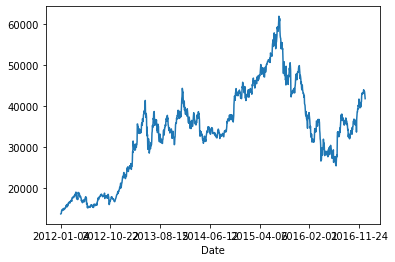

In [3]:
train.set_index('Date', inplace=True)
train['Close'].plot();

In [4]:
X = train[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y = train[['Close']]

X_test = test[['Open', 'High', 'Low', 'Volume', 'Trading Value']]
y_test = test[['Close']]

In [5]:
clf = RandomForestClassifier()
clf.fit(X,y)

C:\Users\Brian\AppData\Local\Temp/ipykernel_14440/1974482336.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X,y)


RandomForestClassifier()

In [6]:
pred = clf.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, pred)
mse

58735.71428571428

In [8]:
mae = mean_absolute_error(y_test, pred)
mae

188.57142857142858

In [9]:
regr = RandomForestRegressor()
regr.fit(X, y)
pred = regr.predict(X_test)

C:\Users\Brian\AppData\Local\Temp/ipykernel_14440/1395229835.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


In [10]:
mse = mean_squared_error(y_test, pred)
mse

126038.51000000013